In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,day,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,Tuesday,scattered clouds,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,Clouds,Wednesday,broken clouds,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,Thursday,overcast clouds,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,Friday,overcast clouds,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,Saturday,broken clouds,02-10-2012 13:00,4918


In [4]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,day,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,Saturday,broken clouds,30-09-2018 19:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,Sunday,overcast clouds,30-09-2018 20:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,Monday,proximity thunderstorm,30-09-2018 21:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,Tuesday,overcast clouds,30-09-2018 22:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,Wednesday,overcast clouds,30-09-2018 23:00,954


In [5]:
df = df.dropna()

### data is from 2nd october 2012 to 30 september 2018
### now let us train our model from 2012 to 2017 data and predict 2018 

In [6]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [7]:
# pip install category-encoders

import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['weather_main'],return_df=True,
                           mapping=[{'col':'weather_main',
'mapping':{'Clouds':0,'Clear':1,'Rain':2,'Drizzle':3,'Mist':4,'Haze':5,'Fog':5,'Thunderstorm':6,'Snow':7,'Squall':8,'Smoke':9}}])

In [8]:
df = encoder.fit_transform(df)


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [9]:
df.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,day,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,0,Tuesday,scattered clouds,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,0,Wednesday,broken clouds,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,0,Thursday,overcast clouds,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,0,Friday,overcast clouds,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,0,Saturday,broken clouds,02-10-2012 13:00,4918
5,None,291.72,0.0,0.0,1,1,Sunday,sky is clear,02-10-2012 14:00,5181
6,None,293.17,0.0,0.0,1,1,Monday,sky is clear,02-10-2012 15:00,5584
7,None,293.86,0.0,0.0,1,1,Tuesday,sky is clear,02-10-2012 16:00,6015
8,None,294.14,0.0,0.0,20,0,Wednesday,few clouds,02-10-2012 17:00,5791
9,None,293.10,0.0,0.0,20,0,Thursday,few clouds,02-10-2012 18:00,4770


In [10]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [11]:
encoder= ce.OrdinalEncoder(cols=['weather_description'],return_df=True,
                           mapping=[{'col':'weather_description',
'mapping':{'scattered clouds':0, 'broken clouds':1, 'overcast clouds':2,
       'sky is clear':3, 'few clouds':4, 'light rain':5,
       'light intensity drizzle':6, 'mist':7, 'haze':8, 'fog':9,
       'proximity shower rain':10, 'drizzle':11, 'moderate rain':12,
       'heavy intensity rain':13, 'proximity thunderstorm':14,
       'thunderstorm with light rain':15, 'proximity thunderstorm with rain':16,
       'heavy snow':17, 'heavy intensity drizzle':18, 'snow':19,
       'thunderstorm with heavy rain':20, 'freezing rain':21, 'shower snow':22,
       'light rain and snow':23, 'light intensity shower rain':24, 'SQUALLS':25,
       'thunderstorm with rain':26, 'proximity thunderstorm with drizzle':27,
       'thunderstorm':28, 'Sky is Clear':3, 'very heavy rain':29,
       'thunderstorm with light drizzle':30, 'light snow':31,
       'thunderstorm with drizzle':32, 'smoke':33, 'shower drizzle':34,
       'light shower snow':35, 'sleet':36}}])

In [12]:
df = encoder.fit_transform(df)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
df.head(20)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,day,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,0,Tuesday,0,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,0,Wednesday,1,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,0,Thursday,2,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,0,Friday,2,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,0,Saturday,1,02-10-2012 13:00,4918
5,None,291.72,0.0,0.0,1,1,Sunday,3,02-10-2012 14:00,5181
6,None,293.17,0.0,0.0,1,1,Monday,3,02-10-2012 15:00,5584
7,None,293.86,0.0,0.0,1,1,Tuesday,3,02-10-2012 16:00,6015
8,None,294.14,0.0,0.0,20,0,Wednesday,4,02-10-2012 17:00,5791
9,None,293.10,0.0,0.0,20,0,Thursday,4,02-10-2012 18:00,4770


In [14]:
encoder= ce.OrdinalEncoder(cols=['day'],return_df=True,
                           mapping=[{'col':'day',
'mapping':{'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}}])
df = encoder.fit_transform(df)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [15]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,day,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,0,1,0,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,0,2,1,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,0,3,2,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,0,4,2,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,0,5,1,02-10-2012 13:00,4918
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,0,5,1,30-09-2018 19:00,3543
48200,None,282.76,0.0,0.0,90,0,6,2,30-09-2018 20:00,2781
48201,None,282.73,0.0,0.0,90,6,0,14,30-09-2018 21:00,2159
48202,None,282.09,0.0,0.0,90,0,1,2,30-09-2018 22:00,1450


In [16]:
# drop holiday , rain_1h , snow_1h as they are always 0

df = df.drop(['holiday','rain_1h','snow_1h'], axis = 1)


In [17]:
dat= pd.to_datetime(df.date_time, format='%d-%m-%Y %H:%M')

In [18]:
type(dat)
dat = dat.to_frame()
dat

,date_time
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00
...,...
48199,2018-09-30 19:00:00
48200,2018-09-30 20:00:00
48201,2018-09-30 21:00:00
48202,2018-09-30 22:00:00


In [19]:
dat['year'] = dat['date_time'].dt.year
dat['month'] = dat['date_time'].dt.month
dat['day'] = dat['date_time'].dt.day
dat['hour'] = dat['date_time'].dt.hour

In [20]:
dat

,date_time,year,month,day,hour
0,2012-10-02 09:00:00,2012,10,2,9
1,2012-10-02 10:00:00,2012,10,2,10
2,2012-10-02 11:00:00,2012,10,2,11
3,2012-10-02 12:00:00,2012,10,2,12
4,2012-10-02 13:00:00,2012,10,2,13
...,...,...,...,...,...
48199,2018-09-30 19:00:00,2018,9,30,19
48200,2018-09-30 20:00:00,2018,9,30,20
48201,2018-09-30 21:00:00,2018,9,30,21
48202,2018-09-30 22:00:00,2018,9,30,22


In [21]:
df

,temp,clouds_all,weather_main,day,weather_description,date_time,traffic_volume
0,288.28,40,0,1,0,02-10-2012 09:00,5545
1,289.36,75,0,2,1,02-10-2012 10:00,4516
2,289.58,90,0,3,2,02-10-2012 11:00,4767
3,290.13,90,0,4,2,02-10-2012 12:00,5026
4,291.14,75,0,5,1,02-10-2012 13:00,4918
...,...,...,...,...,...,...,...
48199,283.45,75,0,5,1,30-09-2018 19:00,3543
48200,282.76,90,0,6,2,30-09-2018 20:00,2781
48201,282.73,90,6,0,14,30-09-2018 21:00,2159
48202,282.09,90,0,1,2,30-09-2018 22:00,1450


In [46]:
#df = df[(df["day"] == 6)]

In [22]:
df = df.values
dat=dat.values

In [23]:
a = df[:,0:5]
b = dat[:,1:]
x = np.hstack((b,a))
y = df[:,-1]

In [24]:
dat.shape

(48204, 5)

In [25]:
print(x)
print(y)
print(x.shape)

[[2012 10 2 ... 0 1 0]
 [2012 10 2 ... 0 2 1]
 [2012 10 2 ... 0 3 2]
 ...
 [2018 9 30 ... 6 0 14]
 [2018 9 30 ... 0 1 2]
 [2018 9 30 ... 0 2 2]]
[5545 4516 4767 ... 2159 1450 954]
(48204, 9)


In [26]:
print(x[0:5,:])

[[2012 10 2 9 288.28 40 0 1 0]
 [2012 10 2 10 289.36 75 0 2 1]
 [2012 10 2 11 289.58 90 0 3 2]
 [2012 10 2 12 290.13 90 0 4 2]
 [2012 10 2 13 291.14 75 0 5 1]]


In [27]:
X = x[0:37602]
print(X)

[[2012 10 2 ... 0 1 0]
 [2012 10 2 ... 0 2 1]
 [2012 10 2 ... 0 3 2]
 ...
 [2017 9 30 ... 0 3 1]
 [2017 9 30 ... 0 4 0]
 [2017 9 30 ... 0 5 1]]


In [28]:
Y = y[0:37602]
print(Y.shape,X.shape)

(37602,) (37602, 9)


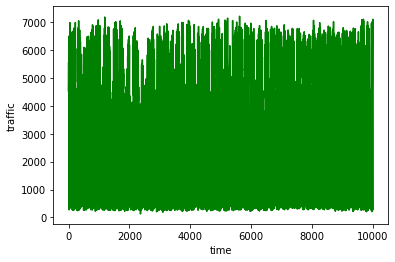

In [29]:
plt.plot(Y[0:10000],c = 'green',label = 'actual')
plt.xlabel('time')
plt.ylabel('traffic')

plt.show()

In [30]:
X_to = X[:,:]

In [31]:
from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt.fit(X,Y)
print(rt.score(X, Y)*100)

97.82283167703902


In [32]:
x_test = x[37603:,:]
y_test = y[37603:48204]
print(x_test.shape,y_test.shape)
y.shape
x_test2=x_test[:,4:]

(10601, 9) (10601,)


In [33]:
rt.score(x_test,y_test)*100

77.4098764528352

In [34]:
pred = rt.predict(x_test)

In [35]:
import math
MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)
print(MSE)

937.7176687913687
879314.426363519


In [36]:
adr = (np.sum(np.subtract(pred,y_test)/y_test))/10601
print(adr)

0.18578695067958195


# improved accuracy

In [63]:
x_test1 = x[38950:39000,:]
y_test1 = y[38950:39000]

In [64]:
rt.score(x_test1,y_test1)

0.9171040720563162

Text(0, 0.5, 'traffic')

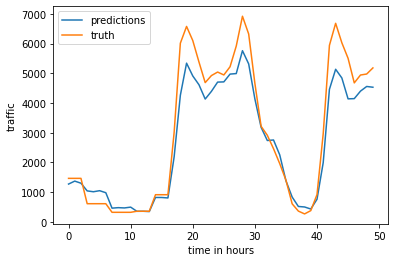

In [65]:
p = rt.predict(x_test1)
plt.plot(p,label='predictions')
plt.plot(y_test1,label='truth')
plt.legend()
plt.xlabel('time in hours')
plt.ylabel('traffic')


In [66]:
x_test2 = x[38700:39000,:]
y_test2 = y[38700:39000]
print(x_test2)

[[2017 11 5 ... 0 5 2]
 [2017 11 5 ... 0 6 2]
 [2017 11 5 ... 0 0 2]
 ...
 [2017 11 16 ... 0 1 2]
 [2017 11 16 ... 0 2 2]
 [2017 11 16 ... 0 3 2]]


In [67]:
rt.score(x_test2,y_test2)

0.8653893609655943

Text(0, 0.5, 'traffic')

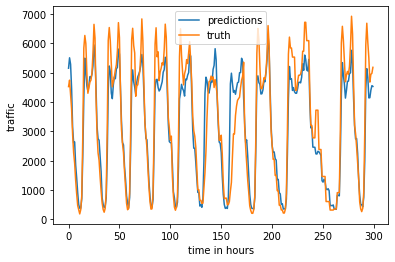

In [68]:
p = rt.predict(x_test2)
plt.plot(p,label='predictions')
plt.plot(y_test2,label='truth')
plt.legend()
plt.xlabel('time in hours')
plt.ylabel('traffic')

In [69]:
predic= rt.predict(x_test2)

In [72]:
import math
MSE = np.square(np.subtract(y_test2,predic)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)
print(MSE)

771.3751941260316
595019.690112973


In [73]:
x_test3 = x[38900:39000,:]
y_test3 = y[38900:39000]
#print(x_test3)

In [74]:
rt.score(x_test3,y_test3)


0.9035112450760308

Text(0, 0.5, 'traffic')

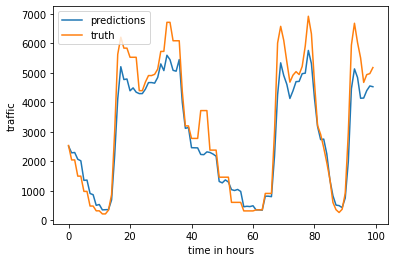

In [75]:
p = rt.predict(x_test3)
plt.plot(p,label='predictions')
plt.plot(y_test3,label='truth')
plt.legend()
plt.xlabel('time in hours')
plt.ylabel('traffic')

In [77]:
MSE = np.square(np.subtract(y_test3,predi)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

689.5430596391499


In [76]:
predi=rt.predict(x_test3)

In [111]:
X = x[:39400,:]
Y= y[:39400]
from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt.fit(X,Y)
print(rt.score(X, Y)*100)

97.8261637984831


In [38]:
x_test1 = x[38950:39000,:]
y_test1 = y[38950:39000]
print(rt.score(x_test1,y_test1))

p=rt.predict(x_test1)
MSE = np.square(np.subtract(y_test1,p)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

0.9171040720563162
675.9297872773474


Text(0, 0.5, 'traffic')

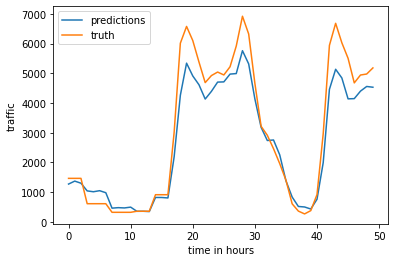

In [39]:
p = rt.predict(x_test1)
plt.plot(p,label='predictions')
plt.plot(y_test1,label='truth')
plt.legend()
plt.xlabel('time in hours')
plt.ylabel('traffic')

In [45]:
print(y_test1[18:30])

[6015 6580 6104 5379 4687 4924 5043 4945 5221 5919 6923 6325]


In [62]:
y_test2 = y[28077:28127]
print(y_test2[18:30])
x_test2 = x[28077:28127,:]
# print(x_test2)

[2766 5639 5639 5697 5697 4800 5325 5325 4183 4349 4451 4730]


In [54]:
x_test1

array([[2017, 11, 14, 23, 279.61, 90, 4, 3, 7],
       [2017, 11, 14, 23, 279.61, 90, 2, 4, 5],
       [2017, 11, 14, 23, 279.61, 90, 5, 5, 9],
       [2017, 11, 15, 0, 279.62, 90, 3, 6, 11],
       [2017, 11, 15, 0, 279.62, 90, 4, 0, 7],
       [2017, 11, 15, 0, 279.62, 90, 2, 1, 5],
       [2017, 11, 15, 0, 279.62, 90, 5, 2, 9],
       [2017, 11, 15, 1, 279.75, 90, 3, 3, 11],
       [2017, 11, 15, 1, 279.75, 90, 4, 4, 7],
       [2017, 11, 15, 1, 279.75, 90, 2, 5, 5],
       [2017, 11, 15, 1, 279.75, 90, 5, 6, 9],
       [2017, 11, 15, 3, 280.15, 90, 4, 0, 7],
       [2017, 11, 15, 3, 280.15, 90, 2, 1, 5],
       [2017, 11, 15, 3, 280.15, 90, 3, 2, 11],
       [2017, 11, 15, 4, 279.61, 90, 4, 3, 7],
       [2017, 11, 15, 4, 279.61, 90, 5, 4, 9],
       [2017, 11, 15, 4, 279.61, 90, 3, 5, 11],
       [2017, 11, 15, 5, 279.35, 90, 4, 6, 7],
       [2017, 11, 15, 6, 278.61, 75, 4, 0, 7],
       [2017, 11, 15, 7, 277.75, 75, 0, 1, 1],
       [2017, 11, 15, 8, 276.68, 75, 4, 2, 7],
      

# try out for 2017

In [119]:
X = x[0:28812,:]
Y = y[0:28812]

In [120]:
from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt.fit(X,Y)
print(rt.score(X, Y)*100)

97.85693658458807


In [121]:
x_test = x[29900:30200,:]
y_test = y[29900:30200]
rt.score(x_test,y_test)

0.8108068271835702

In [123]:
import math
p = rt.predict(x_test)
MSE = np.square(np.subtract(y_test,p)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

780.8563506663864


Text(0, 0.5, 'traffic')

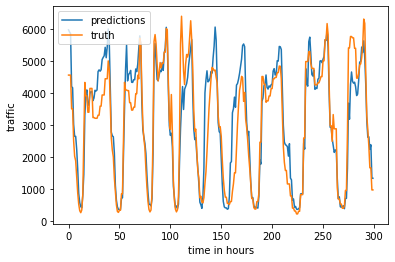

In [95]:
p = rt.predict(x_test)
plt.plot(p,label='predictions')
plt.plot(y_test,label='truth')
plt.legend()
plt.xlabel('time in hours')
plt.ylabel('traffic')

In [96]:
x_test

array([[2017, 1, 9, ..., 7, 4, 31],
       [2017, 1, 9, ..., 4, 5, 7],
       [2017, 1, 9, ..., 5, 6, 8],
       ...,
       [2017, 1, 18, ..., 5, 0, 9],
       [2017, 1, 18, ..., 5, 1, 9],
       [2017, 1, 18, ..., 4, 2, 7]], dtype=object)

0.7425056381277697


Text(0, 0.5, 'traffic')

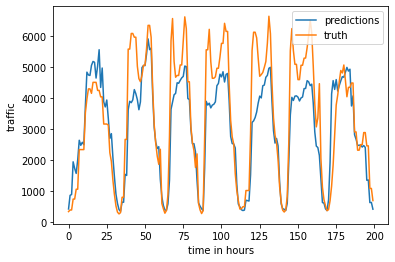

In [104]:
x_test = x[28800:29000,:]
y_test = y[28800:29000]
print(rt.score(x_test,y_test))

p = rt.predict(x_test)
plt.plot(p,label='predictions')
plt.plot(y_test,label='truth')
plt.legend()
plt.xlabel('time in hours')
plt.ylabel('traffic')

98.04756907724965
0.640358594342333


Text(0, 0.5, 'traffic')

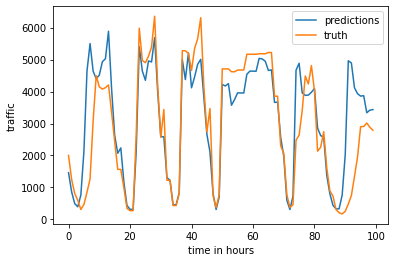

In [124]:
X = x[0:20052,:]
Y = y[0:20052]

from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt.fit(X,Y)
print(rt.score(X, Y)*100)

x_test = x[20100:20200,:]
y_test = y[20100:20200]
print(rt.score(x_test,y_test))

p = rt.predict(x_test)
plt.plot(p,label='predictions')
plt.plot(y_test,label='truth')
plt.legend()
plt.xlabel('time in hours')
plt.ylabel('traffic')

0.7915543048558469


Text(0, 0.5, 'traffic')

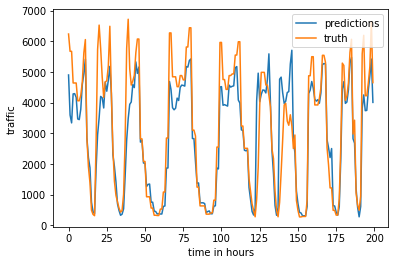

In [126]:
x_test = x[20400:20600,:]
y_test = y[20400:20600]
print(rt.score(x_test,y_test))

p = rt.predict(x_test)
plt.plot(p,label='predictions')
plt.plot(y_test,label='truth')
plt.legend()
plt.xlabel('time in hours')
plt.ylabel('traffic')

In [127]:
x_test

array([[2016, 1, 4, ..., 5, 3, 9],
       [2016, 1, 4, ..., 5, 4, 9],
       [2016, 1, 4, ..., 4, 5, 7],
       ...,
       [2016, 1, 13, ..., 0, 4, 1],
       [2016, 1, 13, ..., 5, 5, 8],
       [2016, 1, 13, ..., 5, 6, 8]], dtype=object)

In [128]:
import math
p = rt.predict(x_test)
MSE = np.square(np.subtract(y_test,p)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

938.5605153274238


# ok

In [22]:
data = pd.DataFrame(data = x)

In [23]:
data

,0,1,2,3,4,5,6,7
0,2012,10,2,9,288.28,40,0,0
1,2012,10,2,10,289.36,75,0,1
2,2012,10,2,11,289.58,90,0,2
3,2012,10,2,12,290.13,90,0,2
4,2012,10,2,13,291.14,75,0,1
...,...,...,...,...,...,...,...,...
48199,2018,9,30,19,283.45,75,0,1
48200,2018,9,30,20,282.76,90,0,2
48201,2018,9,30,21,282.73,90,6,14
48202,2018,9,30,22,282.09,90,0,2


In [24]:
data_dum = pd.get_dummies(data, sparse=True)

In [25]:
data_dum

,0_2012,0_2013,0_2014,0_2015,0_2016,0_2017,0_2018,1_1,1_2,1_3,...,7_27,7_28,7_29,7_30,7_31,7_32,7_33,7_34,7_35,7_36
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48200,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48202,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data_dum = data_dum.values
x = data_dum

# Random forest regressor score = 77

In [32]:
p = rt.predict(x_test)

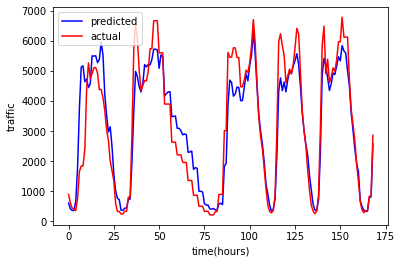

In [34]:
plt.plot(p[0:169],c='b',label='predicted')

plt.plot(y_test[0:169],c='r',label='actual')
plt.xlabel("time(hours)")
plt.ylabel("traffic")
plt.legend()
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)
print(lr.score(X, Y)*100)

13.831785192457701


In [41]:
pred = lr.predict(x_test)

In [42]:
import math
MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)
print(MSE)

1826.5378802931107
3336240.6281456496


# linear regression score = 13.83

In [45]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(X,Y)
print(dec_tree.score(X, Y)*100)

100.0


In [46]:
dec_tree.score(x_test,y_test)*100

59.512431766685204

In [47]:
pred = dec_tree.predict(x_test)

In [48]:
import math
MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)
print(MSE)

1255.3754824827022
1575967.6020186774


In [49]:
adr = (np.sum(np.subtract(pred,y_test)/y_test))/10601
print(adr)

0.1927674175185364


# decision tree score = 59.15

In [45]:
Y = np.reshape(Y,(-1,1))

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_svr = sc_x.fit_transform(X)
y_train_svr = sc_y.fit_transform(Y)

svr_reg = SVR(kernel = 'poly',gamma='scale',degree=10)
svr_reg.fit(x_train_svr,y_train_svr)

svr_y_predict = sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_test)))

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
#print(svr_reg.score(X, Y)*100)

In [50]:
import math
MSE = np.square(np.subtract(y_test,svr_y_predict)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)
print(MSE)

1178.5619713908989
1389008.3204088018


# support vector regression score = -267.54

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(X)
preg.fit(pf,Y)
print(preg.score(pf, Y)*100)

65.20184451885189


In [87]:
x_test
#pred = preg.predict(x_test)

array([[2017, 10, 1, ..., 75, 0, 1],
       [2017, 10, 1, ..., 90, 2, 5],
       [2017, 10, 1, ..., 40, 2, 5],
       ...,
       [2018, 9, 30, ..., 90, 6, 14],
       [2018, 9, 30, ..., 90, 0, 2],
       [2018, 9, 30, ..., 90, 0, 2]], dtype=object)

In [88]:
import math
MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)
print(MSE)

3823.399229313931
14618381.666718362


# polynomial regression = 65.2

In [32]:
pl = p.tolist()
print(pl[0:1000])

[606.102, 413.598, 360.126, 359.874, 677.248, 1804.376, 3760.79, 5129.19, 5166.738, 4638.058, 4727.388, 4444.688, 4571.136, 5498.914, 5491.274, 5504.346, 5274.816, 5374.13, 5953.316, 5535.922, 4219.88, 3527.662, 2969.194, 3140.884, 2482.28, 1573.954, 1009.2, 764.504, 715.74, 368.964, 363.762, 436.69, 442.146, 722.412, 739.88, 1976.16, 3619.402, 4983.912, 4805.88, 4475.234, 4301.278, 4574.274, 5207.754, 5135.192, 5215.284, 5198.248, 5376.86, 5719.562, 5719.878, 5696.992, 5086.926, 5528.138, 5471.518, 4165.056, 4241.392, 4300.582, 4308.088, 3474.106, 3491.088, 3499.002, 3088.96, 3090.786, 3020.246, 2874.028, 2903.936, 2881.672, 2294.04, 2304.27, 2334.85, 1725.868, 1784.488, 1759.376, 999.346, 996.822, 974.46, 587.344, 539.544, 539.112, 413.212, 404.034, 424.558, 379.834, 379.68, 576.696, 602.216, 553.65, 1833.87, 1920.986, 3864.106, 4694.012, 4610.876, 4159.084, 4230.246, 4460.896, 4445.698, 4008.868, 4015.1, 4454.09, 4899.266, 4666.768, 5188.402, 5525.746, 6318.788, 5557.844, 4496.912, 

In [33]:
yl = y_test.tolist()
print(yl[0:1000])

[894, 617, 426, 426, 356, 765, 1654, 1838, 1838, 2403, 4429, 5265, 4748, 4906, 5108, 5108, 4921, 4377, 4385, 4110, 3680, 3060, 2693, 2003, 1686, 1349, 581, 326, 326, 241, 241, 334, 334, 803, 803, 2894, 5683, 6577, 6054, 5018, 4342, 4519, 4683, 4670, 4994, 5737, 5737, 6667, 6667, 6667, 5599, 5599, 5599, 3897, 3897, 3897, 3897, 2631, 2631, 2631, 2208, 2208, 2208, 1958, 1958, 1958, 1356, 1356, 1356, 867, 867, 867, 501, 501, 501, 332, 332, 332, 212, 212, 212, 324, 324, 895, 895, 895, 3013, 3013, 5614, 5455, 5455, 5764, 5764, 5443, 5443, 4472, 4472, 4696, 5026, 4939, 5270, 5828, 6706, 5953, 4652, 3457, 2836, 2419, 1768, 1084, 533, 328, 281, 360, 860, 3010, 5971, 6233, 5836, 5516, 4606, 4826, 5062, 4899, 5207, 5751, 6415, 6231, 4990, 3687, 2987, 2511, 1713, 1042, 529, 344, 250, 345, 885, 3040, 5850, 6490, 4907, 5389, 4613, 4786, 5100, 4991, 5369, 5968, 5968, 6783, 6122, 6122, 6122, 4731, 3724, 3228, 2700, 1924, 1326, 666, 374, 286, 353, 353, 833, 833, 2857, 2857, 5757, 5757, 6727, 6727, 5817

In [32]:
from sklearn import metrics
mae = metrics.mean_absolute_error(p, y_test)
mse = metrics.mean_squared_error(p, y_test)
rmse = np.sqrt(mse)

In [33]:
print(mae)

619.6785239128384


# deep learning

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import tensorflow as tf

In [30]:
no_features_columns = 8
no_target_columns = 1

In [39]:
model = Sequential()
model.add(Dense(32,activation ='relu' , input_shape = [no_features_columns]))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(no_target_columns))

In [42]:
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

In [48]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=400, batch_size=50)

Epoch 1/400
753/753 [==============================] - 2s 1ms/step - loss: 590.0983 - accuracy: 1.7965e-04
Epoch 2/400
753/753 [==============================] - 1s 1ms/step - loss: 599.8044 - accuracy: 9.4158e-05
Epoch 3/400
753/753 [==============================] - 1s 1ms/step - loss: 584.7493 - accuracy: 9.3616e-05
Epoch 4/400
753/753 [==============================] - 1s 1ms/step - loss: 588.2243 - accuracy: 2.8044e-04
Epoch 5/400
753/753 [==============================] - 1s 1ms/step - loss: 588.6630 - accuracy: 9.1482e-05
Epoch 6/400
753/753 [==============================] - 1s 1ms/step - loss: 592.4150 - accuracy: 1.4013e-04
Epoch 7/400
753/753 [==============================] - 1s 1ms/step - loss: 586.4214 - accuracy: 1.5037e-04
Epoch 8/400
753/753 [==============================] - 1s 1ms/step - loss: 589.1867 - accuracy: 4.8850e-04
Epoch 9/400
753/753 [==============================] - 1s 1ms/step - loss: 589.8393 - accuracy: 1.4993e-04
Epoch 10/400
753/753 [===============

753/753 [==============================] - 1s 1ms/step - loss: 592.7622 - accuracy: 1.4324e-04
Epoch 152/400
753/753 [==============================] - 1s 1ms/step - loss: 587.0786 - accuracy: 9.9018e-05
Epoch 153/400
753/753 [==============================] - 1s 1ms/step - loss: 590.3896 - accuracy: 2.3895e-04
Epoch 154/400
753/753 [==============================] - 1s 1ms/step - loss: 583.4517 - accuracy: 1.7147e-04
Epoch 155/400
753/753 [==============================] - 1s 1ms/step - loss: 588.2551 - accuracy: 9.9230e-05
Epoch 156/400
753/753 [==============================] - 1s 1ms/step - loss: 589.9347 - accuracy: 1.5800e-04
Epoch 157/400
753/753 [==============================] - 1s 1ms/step - loss: 599.7696 - accuracy: 2.5345e-04
Epoch 158/400
753/753 [==============================] - 1s 1ms/step - loss: 595.5160 - accuracy: 5.0993e-05
Epoch 159/400
753/753 [==============================] - 1s 1ms/step - loss: 582.3004 - accuracy: 1.9707e-04
Epoch 160/400
753/753 [==========

753/753 [==============================] - 1s 1ms/step - loss: 582.4253 - accuracy: 1.1829e-04
Epoch 301/400
753/753 [==============================] - 1s 1ms/step - loss: 594.9836 - accuracy: 2.0022e-04
Epoch 302/400
753/753 [==============================] - 1s 1ms/step - loss: 591.1533 - accuracy: 1.3748e-04
Epoch 303/400
753/753 [==============================] - 1s 1ms/step - loss: 586.9959 - accuracy: 2.8804e-04
Epoch 304/400
753/753 [==============================] - 1s 1ms/step - loss: 597.7107 - accuracy: 1.0685e-04
Epoch 305/400
753/753 [==============================] - 1s 1ms/step - loss: 593.2915 - accuracy: 2.6821e-04
Epoch 306/400
753/753 [==============================] - 1s 1ms/step - loss: 589.9704 - accuracy: 1.0407e-04
Epoch 307/400
753/753 [==============================] - 1s 1ms/step - loss: 597.9739 - accuracy: 1.6139e-04
Epoch 308/400
753/753 [==============================] - 1s 1ms/step - loss: 577.8079 - accuracy: 1.9346e-04
Epoch 309/400
753/753 [==========

In [49]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

1176/1176 [==============================] - 1s 867us/step - loss: 583.7117 - accuracy: 1.8616e-04
Accuracy: 0.02


In [52]:
y_pred = model.predict(X)

In [54]:
import math
MSE = np.square(np.subtract(Y,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)
print(MSE)

2791.634288369449
7793222.0
